In [ ]:
# sample solution for excercise sheet 100
#
# copyright: Barbara Staehle, HTWG Konstanz
# bstaehle@htwg-konstanz.de
#
# v 1.0 06/2023
# v 2.0 10/2025

# Aufgabe 100.1.1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import pandas as pd
import seaborn as sns

In [3]:
z = [3, 4, 5, 1, 5, 2, 1, 3, 1, 3, 3, 3, 2, 1, 5]
print('Urliste: ', z)


Urliste:  [3, 4, 5, 1, 5, 2, 1, 3, 1, 3, 3, 3, 2, 1, 5]


# Aufgabe 100.1.2

In [4]:
# there are various ways to plot histograms in Python
# I prefer this one
values, counts = np.unique(z,return_counts=True)
print(f'Werte in der Liste: {values}')
print(f'Absolute Häufigkeiten: {counts}')


Werte in der Liste: [1 2 3 4 5]
Absolute Häufigkeiten: [4 2 5 1 3]


# Aufgabe 100.1.3

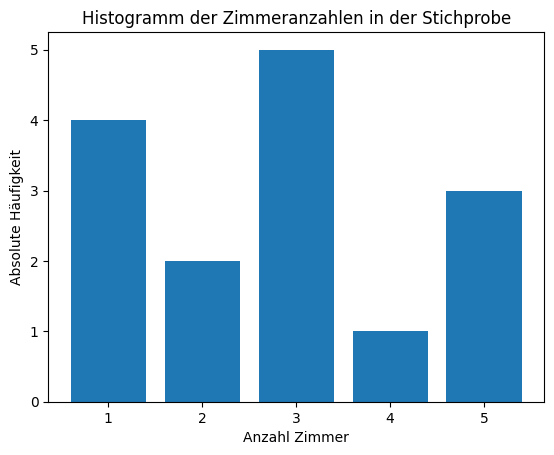

In [5]:
plt.bar(values,counts)
plt.xlabel('Anzahl Zimmer')
plt.ylabel('Absolute Häufigkeit')
plt.title('Histogramm der Zimmeranzahlen in der Stichprobe')
plt.show()

# Aufgabe 100.1.4

## mit Funktion ecdf (schnell aber unhübsch)

Text(0.5, 1.0, 'ECDF der Zimmeranzahlen in der Stichprobe')

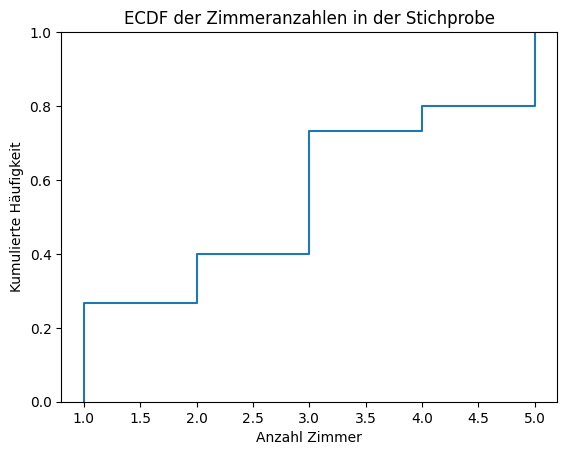

In [4]:
plt.ecdf(z)
plt.xlabel('Anzahl Zimmer')
plt.ylabel('Kumulierte Häufigkeit')
plt.title('ECDF der Zimmeranzahlen in der Stichprobe')

## mit Funktionen cumsum und step (aufwändiger aber hübscher)

Text(0.5, 1.0, 'ECDF der Zimmeranzahlen in der Stichprobe')

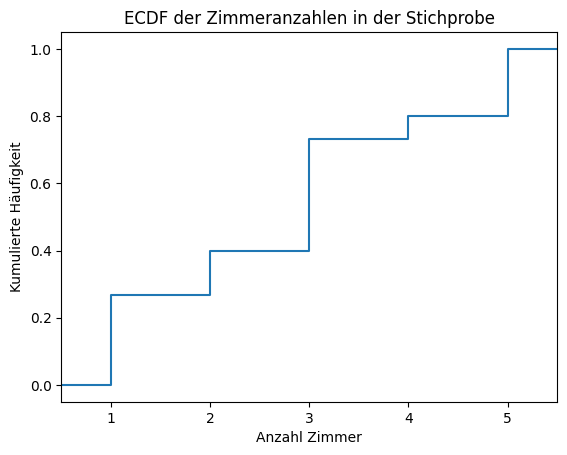

In [5]:
z = np.array(z)
z2 = np.append(z, [-1,0,6])
y = np.array(range(1,len(z)+1))/len(z)
y = np.append(y, [0, 0,1])
plt.step(sorted(z2),sorted(y),where='post')
plt.xlim(0.5,5.5)
plt.xlabel('Anzahl Zimmer')
plt.ylabel('Kumulierte Häufigkeit')
plt.title('ECDF der Zimmeranzahlen in der Stichprobe')

# Aufgabe 100.1.5

## von Hand

In [6]:
print(f'das arithmetische Mittel: {np.mean(z)}')
print(f'den Median: {np.median(z)}')
print(f'den Modalwert: {stat.multimode(z)}')
q25 = np.quantile(z,0.25)
print(f'das 25\%-Quantil: {q25}')
q75 = np.quantile(z,0.75)
print(f'das 75\%-Quantil: {q75}')
print(f'das 90\%-Quantil: {np.quantile(z,0.9)}')
print(f'die empirische Varianz: {np.var(z,ddof=1):.4f}')
print(f'die empirische Standardabweichung: {np.std(z,ddof=1):.4f}')
print(f'den Interquartilabstand: {q75-q25}')
print(f'die Spannweite: {max(z)-min(z)}')

das arithmetische Mittel: 2.8
den Median: 3.0
den Modalwert: [3]
das 25\%-Quantil: 1.5
das 75\%-Quantil: 3.5
das 90\%-Quantil: 5.0
die empirische Varianz: 2.1714
die empirische Standardabweichung: 1.4736
den Interquartilabstand: 2.0
die Spannweite: 4


## Teil-automatisiert mit Pandas (Co-Autor: Le Chat)

In [16]:
z_ser = pd.Series(z)

# Standard-Deskriptivstatistiken
standard_stats = z_ser.describe()

# Zusätzliche Statistiken, die nicht von  berechnen
modalwert = z_ser.mode().values  # Modus (kann mehrere Werte haben)
varianz = z_ser.var()            # Varianz
iqr = z_ser.quantile(0.75) - z_ser.quantile(0.25)  # IQR
range_val = z_ser.max() - z_ser.min()  # Spannweite

# Ergebnisse in einem Dictionary zusammenfassen
erweiterte_statistiken = {
    "Anzahl (count)": standard_stats["count"],
    "Mittelwert (mean)": standard_stats["mean"],
    "Standardabweichung (std)": standard_stats["std"],
    "Minimum (min)": standard_stats["min"],
    "25. Perzentil (Q1)": standard_stats["25%"],
    "Median (50. Perzentil)": standard_stats["50%"],
    "75. Perzentil (Q3)": standard_stats["75%"],
    "Maximum (max)": standard_stats["max"],
    "Modalwert (Modus)": modalwert,
    "Varianz": varianz,
    "Interquartilsabstand (IQR)": iqr,
    "Spannweite (Range)": range_val
}

# Ausgabe
for key, value in erweiterte_statistiken.items():
    print(f"{key}: {value}")



Anzahl (count): 15.0
Mittelwert (mean): 2.8
Standardabweichung (std): 1.4735767952260144
Minimum (min): 1.0
25. Perzentil (Q1): 1.5
Median (50. Perzentil): 3.0
75. Perzentil (Q3): 3.5
Maximum (max): 5.0
Modalwert (Modus): [3]
Varianz: 2.1714285714285713
Interquartilsabstand (IQR): 2.0
Spannweite (Range): 4


# Aufgabe 100.2.1 und 100.2.2

## mittelhübsch mit numpy

In [6]:
N = np.loadtxt("../../data/ninjagokarten.csv", delimiter=';', skiprows=1, usecols=np.arange(1,5), dtype=int)
Nmean = np.mean(N,axis=0)
print(f'Mittelwerte: {np.array2string(Nmean, precision = 3)}')
Nstd = np.std(N,ddof=1,axis=0)
print(f'Standardabweichungen: {np.array2string(Nstd, precision = 3)}')

Mittelwerte: [75.083 63.5   67.    69.583]
Standardabweichungen: [20.969 32.118 28.889 24.905]


## hübscher mit pandas (Co-Autor: Le Chat)

In [7]:
# Daten einlesen
df = pd.read_csv(
    "../../data/ninjagokarten.csv",
    delimiter=';',          # Semikolon als Trennzeichen
    usecols=range(1, 5),     # Spalten 1 bis 4 auswählen (0-basiert: 1, 2, 3, 4)
    dtype=int,               # Alle Spalten als Integer einlesen
    header=0                 # Erste Zeile enthält die Spaltennamen
)

# Ausgabe der ersten Zeilen
print(df.head())

   gelb  rot  blau  gruen
0    62   47    59     31
1    97   40    46     97
2    90   63    74    114
3    69   73    66     54
4    81    9   101     78


In [25]:
# Mittelwerte und Standardabweichungen berechnen
mittelwerte = df.mean()
standardabweichungen = df.std()

# Ergebnisse in einem DataFrame zusammenfassen
statistiken = pd.DataFrame({
    "Mittelwert": mittelwerte,
    "Standardabweichung": standardabweichungen
})

# Ausgabe
print("\n Geforderte Statistiken:")
print(statistiken)


Statistiken:
       Mittelwert  Standardabweichung
gelb    75.083333           20.969494
rot     63.500000           32.117681
blau    67.000000           28.888500
gruen   69.583333           24.905123


# Aufgabe 100.2.3

## mit numpy

Text(0.5, 1.0, 'In ninjagokarten.csv erfasste Werte')

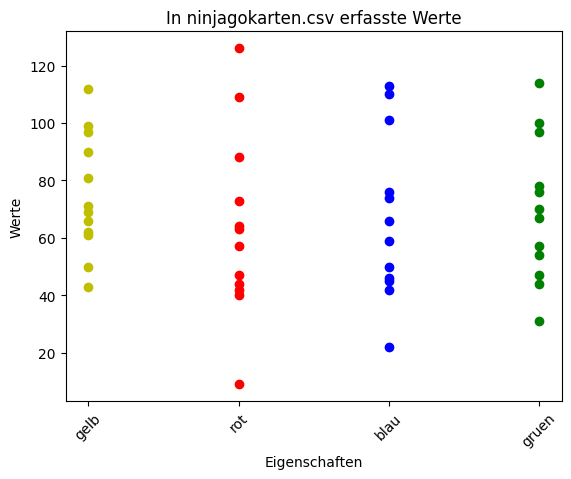

In [10]:
cols = ['y','r','b','g']
i = 0 
s = np.shape(N)
for i in range(0,4):
    plt.plot(np.ones(s[0])*i,N[:,i],color=cols[i], marker='o',linestyle='none')

x = np.array(range(0,4))
labels = ['gelb','rot','blau','gruen']
plt.xticks(x,labels, rotation=45)
plt.xlabel('Eigenschaften');
plt.ylabel('Werte');
plt.title('In ninjagokarten.csv erfasste Werte')


## mit pandas (Co-Autor Le Chat)

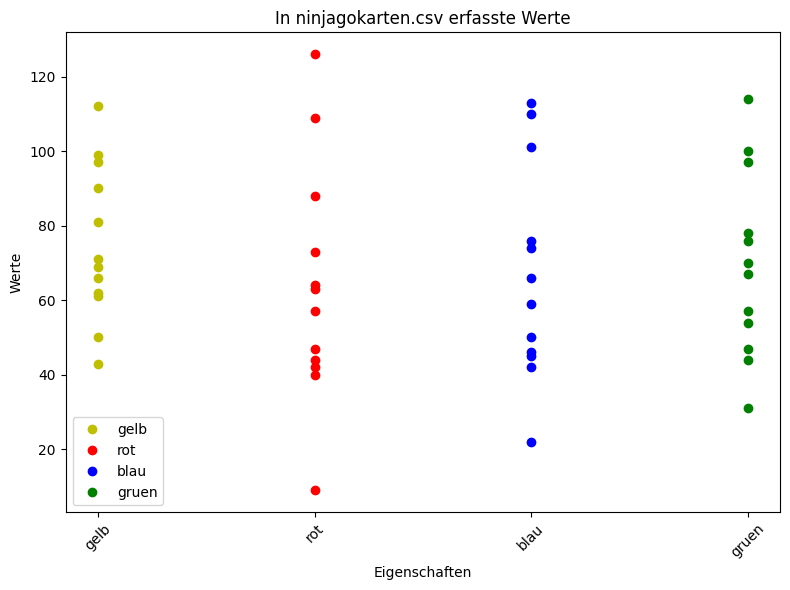

In [31]:
# Anzahl der Zeilen im DataFrame
n_rows = df.shape[0]

# Plot erstellen
plt.figure(figsize=(8, 6))

# Für jede Spalte im DataFrame plotten
for i in range(4):
    plt.plot(
        [i] * n_rows,          # x-Werte: i für alle Zeilen der Spalte
        df.iloc[:, i],         # y-Werte: Werte der i-ten Spalte
        color=cols[i],         # Farbe für die Spalte
        marker='o',            # Marker als Punkte
        linestyle='none',      # Keine Linien zwischen den Punkten
        label=df.columns[i]    # Spaltenname als Label (optional)
    )

# x-Achse anpassen
x = range(0, 4)
plt.xticks(x, labels, rotation=45)

# Achsenbeschriftungen und Titel
plt.xlabel('Eigenschaften')
plt.ylabel('Werte')
plt.title('In ninjagokarten.csv erfasste Werte')

# Legende (optional)
plt.legend()

# Plot anzeigen
plt.tight_layout()
plt.show()

# Aufgabe 100.2.4

## mit numpy

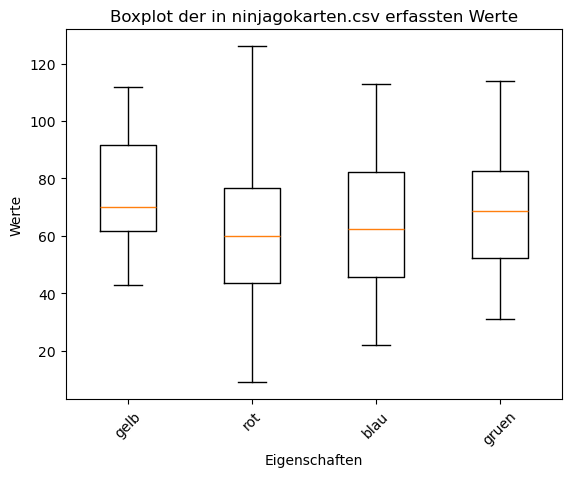

In [10]:
plt.boxplot(N)
plt.xlabel('Eigenschaften');
plt.ylabel('Werte');
plt.title('Boxplot der in ninjagokarten.csv erfassten Werte')
plt.xticks(x+1,labels, rotation=45)
plt.show()

## mit pandas

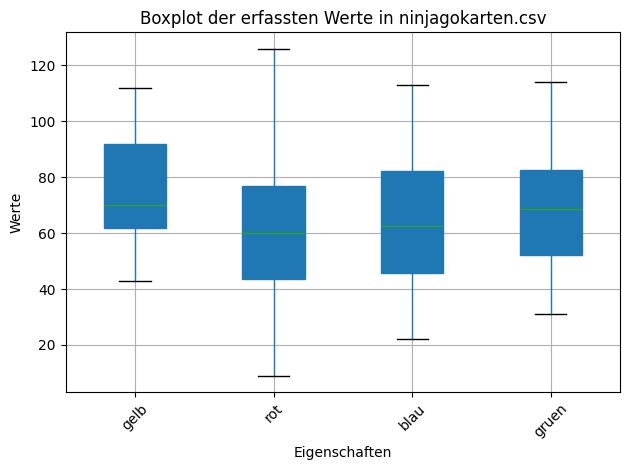

In [33]:
# Boxplot für alle Spalten des DataFrames
df.boxplot(
    grid=True,          # Gitterlinien anzeigen
    patch_artist=True,  # Boxen mit Farbe füllen
    notch=False,        # Kerben für Konfidenzintervalle (optional)
    vert=True,          # Vertikale Boxplots
    labels=df.columns,  # Spaltennamen als x-Achsen-Beschriftungen
    showfliers=True     # Ausreißer anzeigen
)

# Titel und Achsenbeschriftungen
plt.title('Boxplot der erfassten Werte in ninjagokarten.csv')
plt.xlabel('Eigenschaften')
plt.ylabel('Werte')

# x-Achsen-Beschriftungen drehen (falls nötig)
plt.xticks(rotation=45)

# Plot anzeigen
plt.tight_layout()
plt.show()

# Aufgabe 100.2.5

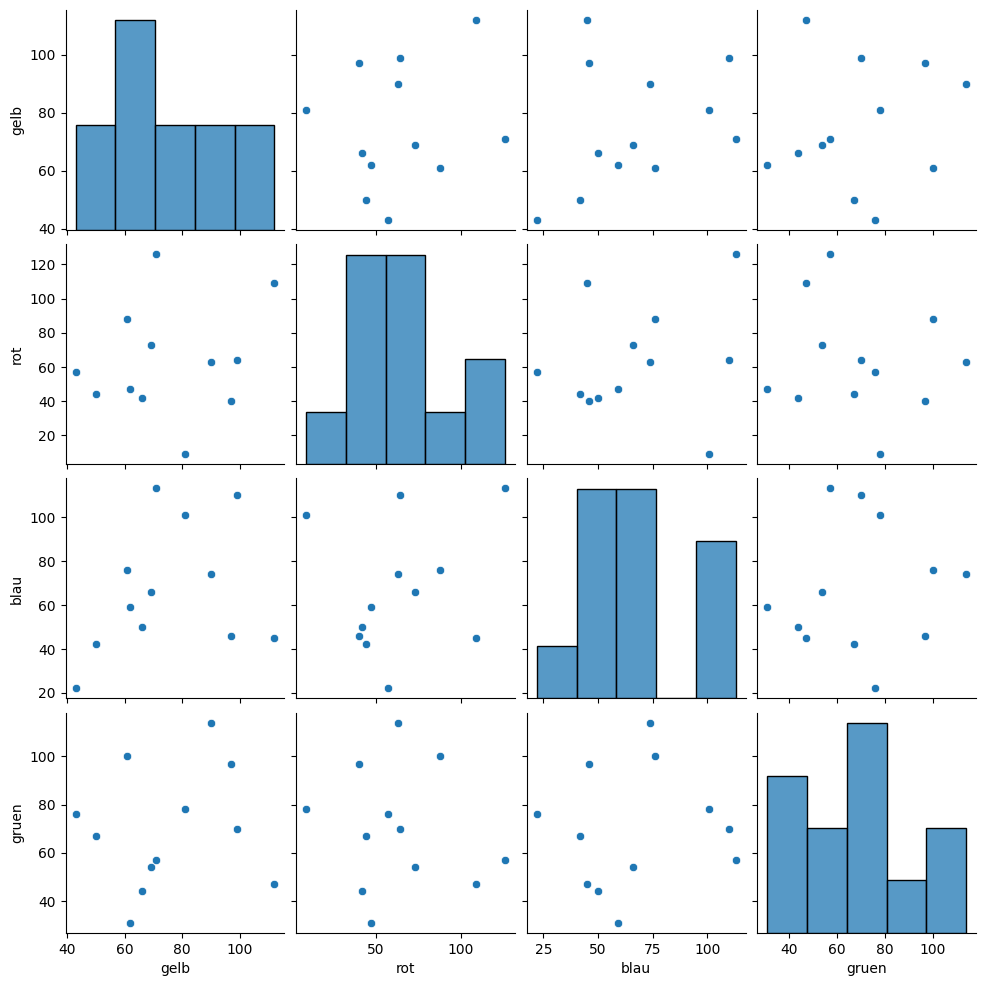

In [45]:
sns.pairplot(df)
plt.show()

# Aufgabe 100.2.6

## mit numpy

In [34]:
C = np.corrcoef(N,rowvar=0)
print(C)

[[ 1.          0.17513887  0.31259615  0.13985291]
 [ 0.17513887  1.          0.1980179  -0.13030122]
 [ 0.31259615  0.1980179   1.          0.0967882 ]
 [ 0.13985291 -0.13030122  0.0967882   1.        ]]


## mit pandas

In [44]:
C_pd = df.corr()
print(C_pd)

           gelb       rot      blau     gruen
gelb   1.000000  0.175139  0.312596  0.139853
rot    0.175139  1.000000  0.198018 -0.130301
blau   0.312596  0.198018  1.000000  0.096788
gruen  0.139853 -0.130301  0.096788  1.000000


# Aufgabe 100.2.7

In [47]:
# setze Schwelle niedrig, um alle Korrelationen zu plotten 
schwelle = 0.01

# Paare mit |r| >= schwelle filtern
relevante_paare = []
for i in range(len(C_pd.columns)):
    for j in range(i + 1, len(C_pd.columns)):  # Vermeidet Duplikate (A-B und B-A)
        if abs(C_pd.iloc[i, j]) >= schwelle:
            relevante_paare.append((C_pd.columns[i], C_pd.columns[j], C_pd.iloc[i, j]))

print(f"Anzahl relevanter Paare: {len(relevante_paare)}")
for p in relevante_paare:
    print(p)

Anzahl relevanter Paare: 6
('gelb', 'rot', 0.17513886725945946)
('gelb', 'blau', 0.3125961513756297)
('gelb', 'gruen', 0.13985290785481944)
('rot', 'blau', 0.19801789772957729)
('rot', 'gruen', -0.1303012248490838)
('blau', 'gruen', 0.09678819606218267)


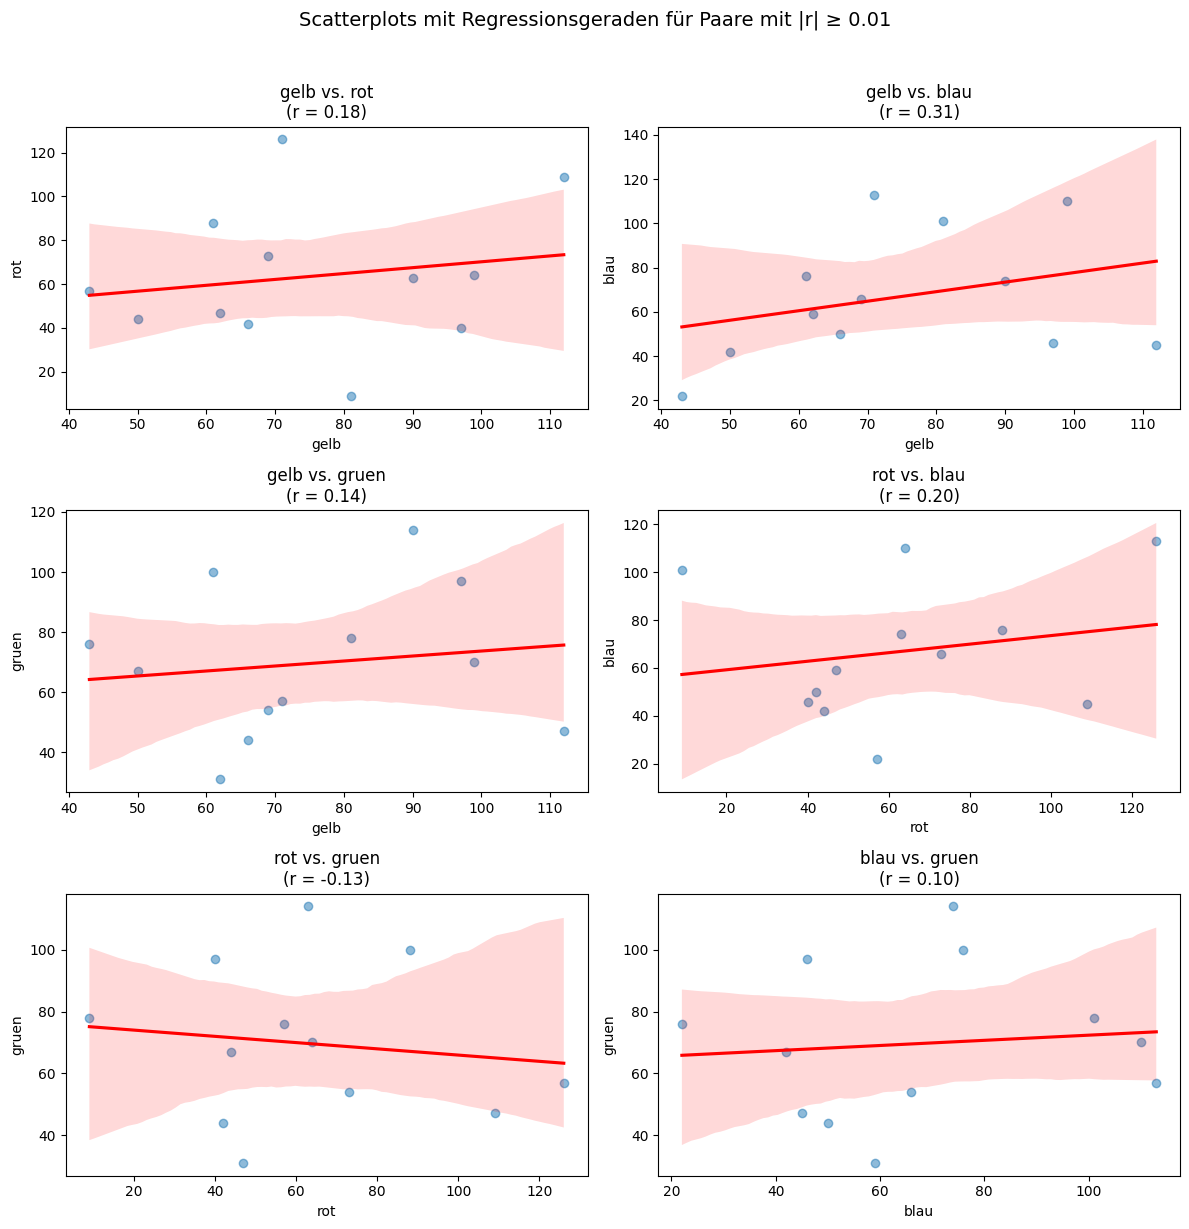

In [49]:
# Anzahl der Paare
n_paare = len(relevante_paare)

# Anzahl der Zeilen und Spalten für das Gitter berechnen
n_zeilen = int(np.ceil(n_paare / 2))
n_spalten = 2

# Gitter erstellen
fig, axes = plt.subplots(n_zeilen, n_spalten, figsize=(12, 4 * n_zeilen))
axes = axes.flatten()  # Flatten für einfache Iteration

# Plots erstellen
for i, (spalte1, spalte2, r) in enumerate(relevante_paare):
    # Scatterplot mit Regressionsgerade
    sns.regplot(
        x=spalte1,
        y=spalte2,
        data=df,
        ax=axes[i],
        scatter_kws={'alpha': 0.5},  # Transparenz der Punkte
        line_kws={'color': 'red'}    # Farbe der Regressionsgerade
    )

    # Titel mit Korrelationskoeffizient
    axes[i].set_title(f"{spalte1} vs. {spalte2}\n(r = {r:.2f})")

    # Achsenbeschriftungen
    axes[i].set_xlabel(spalte1)
    axes[i].set_ylabel(spalte2)

# Leere Subplots ausblenden (falls ungerade Anzahl)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Titel für die gesamte Figur
fig.suptitle(f'Scatterplots mit Regressionsgeraden für Paare mit |r| ≥ {schwelle:.2f}', y=1.02, fontsize=14)

# Platz optimieren
plt.tight_layout()
plt.show()